<a href="https://colab.research.google.com/github/shrprabh/MachineLearning/blob/main/LinearRegression_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

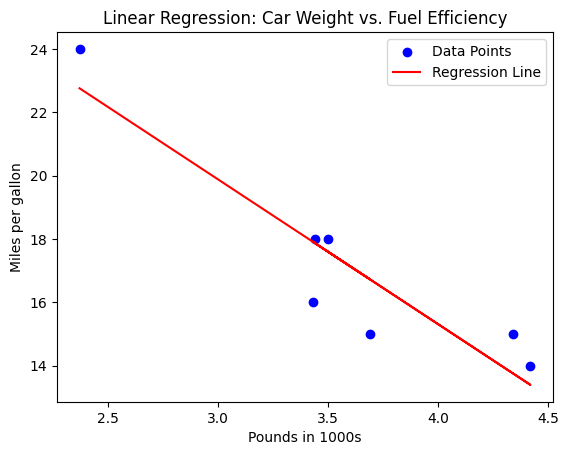

In [ ]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 2: Create the Dataset
X = np.array([3.5, 3.69, 3.44, 3.43, 4.34, 4.42, 2.37]).reshape(-1, 1)  # Feature (Pounds in 1000s)
y = np.array([18, 15, 18, 16, 15, 14, 24])  # Label (Miles per gallon)

# Step 3: Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 4: Plot the Data Points
plt.scatter(X, y, color='blue', label='Data Points')

# Step 5: Plot the Regression Line
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Regression Line')

# Step 6: Add Labels and Title
plt.xlabel('Pounds in 1000s')
plt.ylabel('Miles per gallon')
plt.title('Linear Regression: Car Weight vs. Fuel Efficiency')
plt.legend()

# Step 7: Display the Plot
plt.show()


Car heaviness (in pounds) versus miles per gallon rating. As a car gets heavier, its miles per gallon rating generally decreases.


In [ ]:
# prompt: calculate bias and weight

# Print the bias (intercept) and weight (slope)
print("Bias (Intercept):", model.intercept_)
print("Weight (Slope):", model.coef_[0])


Bias (Intercept): 33.585124042691874
Weight (Slope): -4.569109499755582


In [ ]:
# prompt: know test the model

import numpy as np
# Step 8: Test the Model with New Data
new_X = np.array([3.8, 4.1]).reshape(-1, 1)
predictions = model.predict(new_X)
print("Predictions for new data:", predictions)


Predictions for new data: [16.22250794 14.85177509]


So for 16.22250 and 14.8517 are respective values of 3.8 and 4.1 thousand pounds car

MSE from Linear Regression: 1.4696694813659537
Optimized Bias: 33.585124042691874
Optimized Weight: -4.569109499755582
MSE with optimized bias and weight: 1.4696694813659537


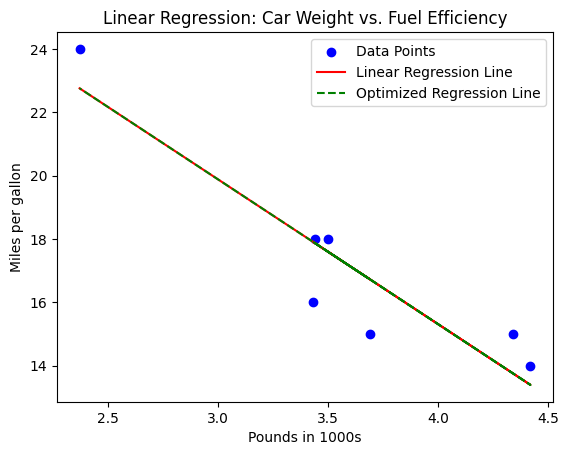

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Create the Dataset
X = np.array([3.5, 3.69, 3.44, 3.43, 4.34, 4.42, 2.37]).reshape(-1, 1)
y = np.array([18, 15, 18, 16, 15, 14, 24])

# Step 3: Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 4: Calculate the MSE
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print('MSE from Linear Regression:', mse)

# Step 4: Plot the Data Points
plt.scatter(X, y, color='blue', label='Data Points')

# Step 5: Plot the Regression Line from Linear Regression Model
plt.plot(X, y_pred, color='red', label='Linear Regression Line')

# Step 6: Add Labels and Title
plt.xlabel('Pounds in 1000s')
plt.ylabel('Miles per gallon')
plt.title('Linear Regression: Car Weight vs. Fuel Efficiency')

# Step 7: Find the bias and weight that minimize MSE (using gradient descent)
initial_bias = model.intercept_
initial_weight = model.coef_[0]

learning_rate = 0.01
num_iterations = 10000

# Initialize bias and weight closer to the linear regression solution
bias = initial_bias
weight = initial_weight

for i in range(num_iterations):
    # Compute predictions
    y_pred = bias + weight * X.flatten()
    error = y - y_pred

    # Calculate gradients
    bias_gradient = -2 * np.mean(error)
    weight_gradient = -2 * np.mean(error * X.flatten())

    # Update bias and weight with learning rate decay
    bias -= (learning_rate / (1 + 0.001 * i)) * bias_gradient
    weight -= (learning_rate / (1 + 0.001 * i)) * weight_gradient

# Print the optimized bias and weight
print("Optimized Bias:", bias)
print("Optimized Weight:", weight)

# Calculate the MSE with the optimized bias and weight
y_pred_optimized = bias + weight * X.flatten()
mse_optimized = mean_squared_error(y, y_pred_optimized)
print("MSE with optimized bias and weight:", mse_optimized)

# Step 8: Plot the Optimized Regression Line (should overlap with Linear Regression Line)
plt.plot(X, y_pred_optimized, color='green', linestyle='dashed', label='Optimized Regression Line')

# Show plot with both lines
plt.legend()
plt.show()


In the graph above, we can see data points and a regression line. The vertical distance between each data point and the regression line represents the error (or residual) for that point. These errors can be positive (if the point is above the regression line) or negative (if the point is below the regression line). However, when calculating certain metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE), we consider only the magnitude of these errors, which means we take either the square (for MSE) or the absolute value (for MAE) of the errors.

MSE is calculated by averaging the squared differences between the predicted values and the actual values, whereas MAE is calculated by averaging the absolute differences. These metrics help us evaluate how well our model fits the data. The goal of regression analysis is to find the model parameters (weights and bias) that minimize this error. This is typically done using optimization techniques like gradient descent, which iteratively adjusts the weights and bias to minimize the chosen loss function (e.g., MSE). By doing this, the model predictions get closer to the actual data points, thereby reducing the overall error.



